# Libraries

In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
import os
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = "Malgun Gothic"


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
sns.set_theme({"grid.linewidth"       : 1.5,  
               "grid.linestyle"       : "--",
               "axes.titlecolor"      : "#000000",
               'axes.titlesize'       : 17,
               'axes.labelweight'     : "bold",
               'legend.fontsize'      : 15,
               'legend.title_fontsize': 15,
               'font.size'            : 15,
               'xtick.labelsize'      : 16,
               'ytick.labelsize'      : 16,        
               })

# Read the Data

In [3]:
cur_dir = os.getcwd()
for roots, folders, files in os.walk(cur_dir):
    if '.git' not in roots:
        print(roots, files)

c:\Users\user\Documents\ML ['ml-outlier.ipynb', 'ml_HeartDisease.ipynb', 'pre.txt']
c:\Users\user\Documents\ML\.vscode ['settings.json']
c:\Users\user\Documents\ML\data ['heart_disease_uci.csv', 'ObesityDataSet.csv']


In [4]:
data_list = os.listdir(cur_dir + "\data")
Dataset = dict()

for data in data_list:
    Dataset[data[:-4]] = pd.read_csv(cur_dir + f"\data\{data}")

In [5]:
data = Dataset['heart_disease_uci']
df = data.copy()

In [6]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Data info

In [7]:
print(f"There are {df.shape[0]} pationts and {df.shape[1]} features in the dataset.")

There are 920 pationts and 16 features in the dataset.


In [8]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [10]:
statitical_summary = df.describe()
statitical_summary.T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


> numeric과 categolical type data 존재 (분류하여 보기)             
> null data가 있어 column별 특성을 알아봐야함

# EDA

## Dtypes

### Categorical Data

In [11]:
df_cat = df.select_dtypes(include = 'object')
df_cat.columns

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

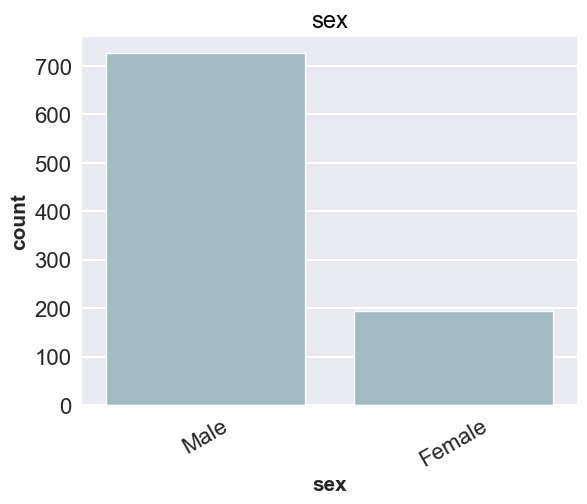

      sex  count
0    Male    726
1  Female    194


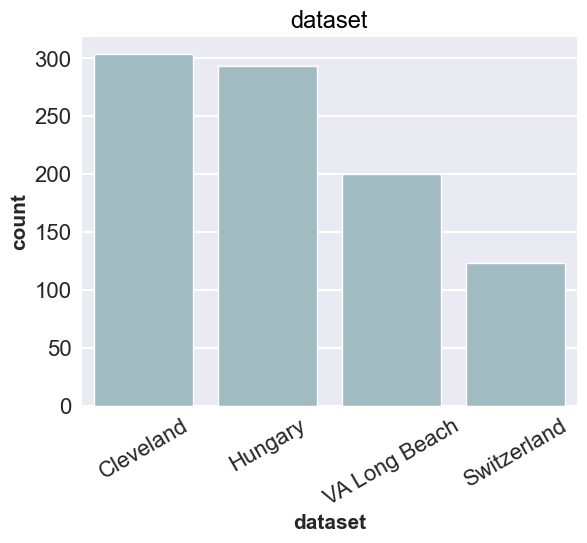

         dataset  count
0      Cleveland    304
1        Hungary    293
2  VA Long Beach    200
3    Switzerland    123


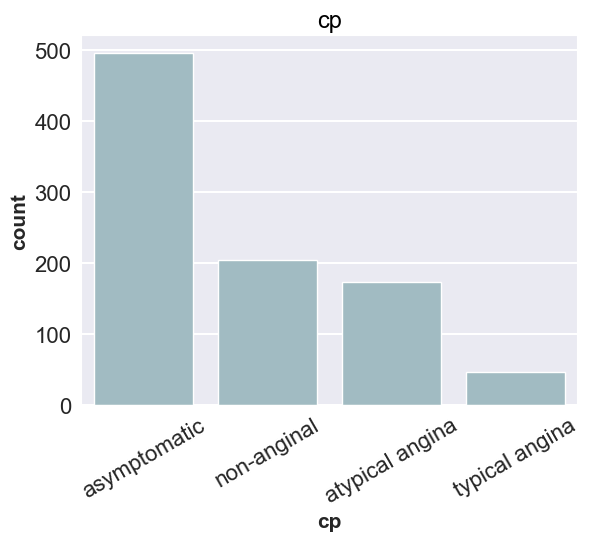

                cp  count
0     asymptomatic    496
1      non-anginal    204
2  atypical angina    174
3   typical angina     46
fbs


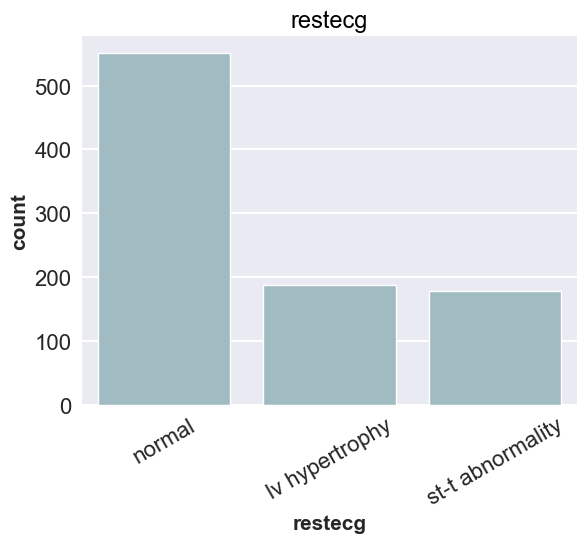

            restecg  count
0            normal    551
1    lv hypertrophy    188
2  st-t abnormality    179
exang


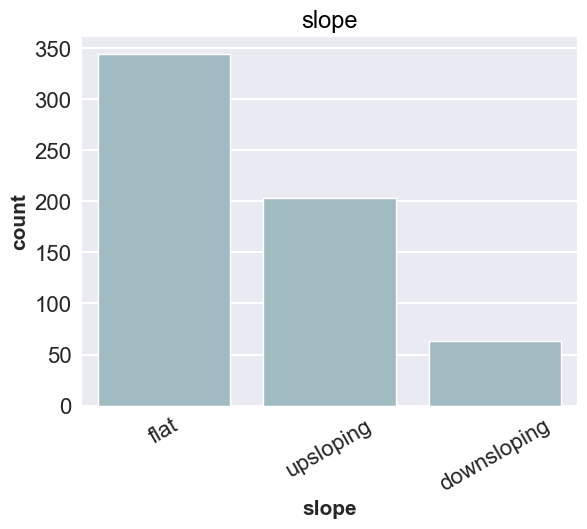

         slope  count
0         flat    345
1    upsloping    203
2  downsloping     63


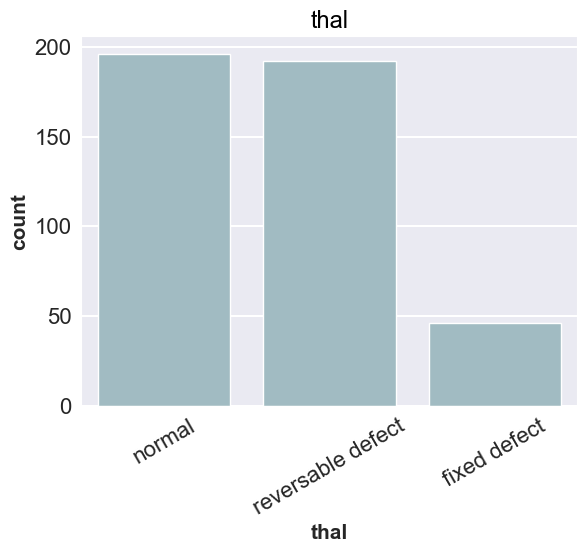

                thal  count
0             normal    196
1  reversable defect    192
2       fixed defect     46


In [37]:
for num, col in enumerate((df_cat.columns)):
    try:    
        num = df_cat[col].value_counts().reset_index()
        sns.barplot(data = df_cat, x = num[col], y = num['count'], color = '#9BBEC8')
        plt.xticks(rotation = 30)
        plt.title(col)
        plt.show()
        print(num)
    except:
        print(col)
        pass

### Numeric data

In [14]:
df_num = df.select_dtypes(include = 'number').drop(columns = ['id'])

In [36]:
for i, col in enumerate((df_num)):
    i = df_num[col].reset_index().sort_values(col)
    i['index'] = 1
    fig = px.histogram(data_frame = i,
                       x = i[col],
                       y = i['index'],
                       marginal = 'box',
                       nbins = i[col].nunique(),
                       color_discrete_sequence = ['#3F72AF'])
    fig.update_layout(title = col, bargap = 0.1)
    fig.show()

## Columns

### Target

In [ ]:
num = df['num'].value_counts().reset_index()
num

,num,count
0,0,411
1,1,265
2,2,109
3,3,107
4,4,28


<Axes: xlabel='num', ylabel='count'>

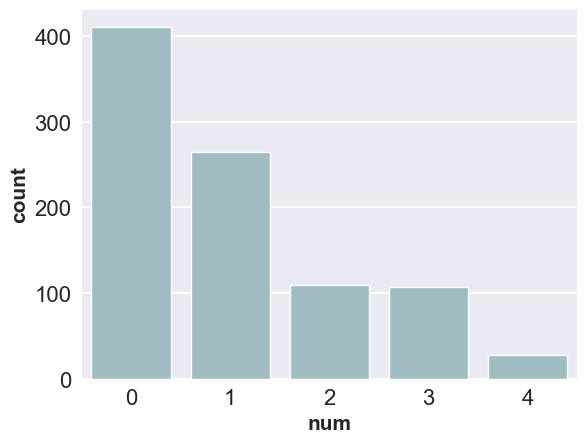

In [ ]:
sns.barplot(data = num, x = num['num'], y = num['count'], color = '#9BBEC8')

> num = target

* 0: No presence of heart disease.
* 1: Certain level or type of heart disease.
* 2: Different level or type of heart disease.
* 3: Another level or type of heart disease.
* 4: Yet another level or type of heart disease.

심장병의 존재 유무와 증상레벨, 타입 전부를 나타내는 지표

### AGE

In [ ]:
max_age = df.age.max()
min_age = df.age.min()

print(f"Age\n-----\nMax Age: {min_age}\nMin Age: {max_age}")

Age
-----
Max Age: 28
Min Age: 77


In [ ]:
fig = px.histogram(df.age, marginal='box', text_auto = True)
fig.show()

In [ ]:
colors = ['lightslategrey'] * 100
colors[26] = 'crimson'
colors[27] = 'crimson'
colors[30] = 'crimson'

trace = go.Bar(x = df.age.value_counts().reset_index().sort_values(by = 'age').age,
               y = df.age.value_counts().reset_index().sort_values(by = 'age')['count'], marker_color = colors, marker_line_color='rgb(8,48,107)')

data = [trace]
go.Figure(data = data)

In [ ]:
df_cp = df.cp.value_counts().reset_index()
df_cp

,cp,count
0,asymptomatic,496
1,non-anginal,204
2,atypical angina,174
3,typical angina,46


### CP(Chest Pain Type)

In [ ]:
df.cp.value_counts().reset_index()

,cp,count
0,asymptomatic,496
1,non-anginal,204
2,atypical angina,174
3,typical angina,46


In [ ]:
colors = ['lightslategrey',]*100
colors[0] = 'crimson'

trace = go.Bar(x = df_cp['cp'],
               y = df_cp['count'], 
               marker_color = colors, 
               marker_line_color='rgb(8,48,107)'
               )

data = [trace]
layout = go.Layout(title = 'Chest Pain Type')
go.Figure(data = data, layout = layout)

* Asymptomatic: 심장병이 있음에도 불구하고 가슴통증이나 불편함이 없음

* Non-anginal: 심장병과 관련없는 가슴통증을 호소, 아마 근육이나 위장 같은 다른 요인들로 인한 통증일 것임
* Atypical angina: 협심증과 비슷한 통증이지만 그 주기, 강도, 트리거가 다름 typical angina로 분류 할 수 없는 증상
* typical angina: 가장 흔한 심장병 관련 가슴 통증 증상, 트리거는 육체운동이나 스트레스이고 니트로 글리세린이 증상에 효과적임

### Trestbps(Blood pressure)

In [ ]:
max_trestbps = df.trestbps.max()
min_trestbps = df.trestbps.min()

print(f"Trestbps:\nMax: {max_trestbps} \nMin: {min_trestbps}")

Trestbps:
Max: 200.0 
Min: 0.0


In [ ]:
x = df.trestbps.value_counts().reset_index().sort_values(by = 'trestbps')['trestbps']
y = df.trestbps.value_counts().reset_index().sort_values(by = 'trestbps')['count']

In [ ]:
trace = go.Histogram(x = x, 
                     y = y, 
                     marker_color = 'rgb(158,202,225)', 
                     marker_line_color='rgb(8,48,107)', text = y, textposition = 'auto')

data = [trace]
layout = go.Layout(title = 'Trestbps hitogram')
go.Figure(data = data, layout = layout)

* 평범한 혈압은 통상적으로 120/80 mmhg 정도임.
* 편차가 크게 표준보다 낮거나 높은 혈압은 건강문제를 나타냄
* 고혈압은 심장병을 유발하고, 저혈압 또한 건강상 나쁘지만 심장병과는 거리가 멈


### Chol(Cholesterol)

In [ ]:
max_chol = df.chol.max()
min_chol = df.chol.min()

print(f"Chol:\nMax Chol: {max_chol}\nMin Chol: {min_chol}")

Chol:
Max Chol: 603.0
Min Chol: 0.0


In [ ]:
x = df.chol.value_counts().reset_index().sort_values(by = 'chol')['chol']
y = df.chol.value_counts().reset_index().sort_values(by = 'chol')['count']

In [ ]:
trace1 = go.Scatter(x = x, y = y, marker_color = 'crimson')
trace2 = go.Bar(x = x, y = y, marker_color = 'blue')

data = [trace1, trace2]
layout = go.Layout(title = "Chol")
fig = go.Figure(data = data, layout = layout)
fig.update_yaxes(range = [0, 180])
fig.show()

* 중간레벨: 통상적으로 200mg/dl, 200~239는 어느정도 높음, 240이상은 많이 높음
* 높은 콜레스테롤 수치: 콜레스테롤 수치의 증가는 심장병을 야기함
* 낮은 콜레스테롤 수치: 낮은수치 또한 건강에 이상이 있음을 보여주지만 심장병은 아님

### FBS(Fasting blood sugar)

In [ ]:
df['fbs'].value_counts().reset_index()

,fbs,count
0,False,692
1,True,138


<Axes: xlabel='fbs', ylabel='count'>

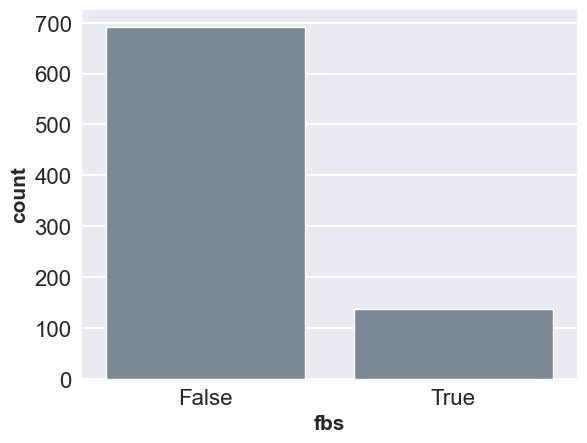

In [ ]:
colors = 'lightslategrey'

sns.countplot(data = df, x = df.fbs, color = colors)

* FBS는 120mg/dl 이상일 경우 심장병에 치명적 요인인 비만일 확률이 높음, 수치가 올라가면 혈관에 무리를 줌
* 0: 120mg/dl 미만
* 1: 120mg/dl 이상

### Restecg(resting electrocardiographic results)

In [ ]:
df_restecg = df['restecg'].value_counts().reset_index()
df_restecg

,restecg,count
0,normal,551
1,lv hypertrophy,188
2,st-t abnormality,179


In [ ]:
colors = ['lightslategrey'] * 20
colors[0] = 'crimson'

trace = go.Bar(x = df_restecg['restecg'], y = df_restecg['count'], marker_color = colors)

data = [trace]
layout = go.Layout(title = 'Resting electrocardiographic')
go.Figure(data = data, layout = layout)

* Normal: EGC에 중대한 문제가 없음
* ST-T Abnormality: 심전도에 잠재적 위험이 있을 수 있음
* Left Ventricular Hypertrophy: 좌심실 확대?

### Thalach(maximum heart rate achieved)